<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Online_Shopping.csv')

In [ ]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Income            1
Age               1
Online Shopper    0
Region            0
dtype: int64

In [ ]:
df['Age']=df['Age'].fillna(method='ffill')

In [ ]:
df['Income']=df['Income'].fillna(method='ffill')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Online Shopper    0
Income            0
Age               0
Region            0
dtype: int64

In [ ]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,73200.0,Yes
5,India,40.0,69600.0,Yes
6,Brazil,40.0,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


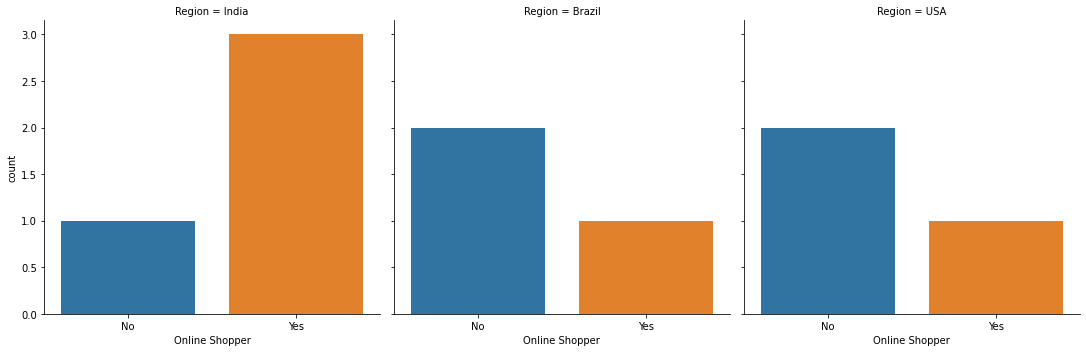

In [ ]:
sns.catplot('Online Shopper', col='Region', data=df, kind='count')

In [ ]:
df.Region.value_counts()

India     4
Brazil    3
USA       3
Name: Region, dtype: int64

In [ ]:
df['Online Shopper'].value_counts()

Yes    5
No     5
Name: Online Shopper, dtype: int64

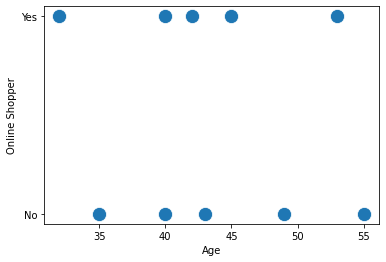

In [ ]:
sns.scatterplot(x='Age',y='Online Shopper',data=df,s=200)

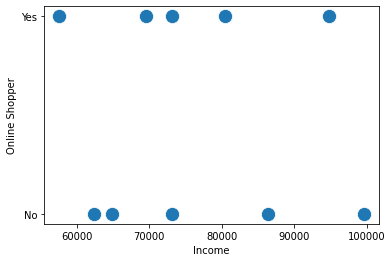

In [ ]:
sns.scatterplot(x='Income',y='Online Shopper',data=df,s=200)

In [ ]:
le=LabelEncoder()
df['Online Shopper']=le.fit_transform(df['Online Shopper'])

In [ ]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,0
1,Brazil,32.0,57600.0,1
2,USA,35.0,64800.0,0
3,Brazil,43.0,73200.0,0
4,USA,45.0,73200.0,1
5,India,40.0,69600.0,1
6,Brazil,40.0,62400.0,0
7,India,53.0,94800.0,1
8,USA,55.0,99600.0,0
9,India,42.0,80400.0,1


In [ ]:
df['Region']=le.fit_transform(df['Region'])

In [ ]:
df

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,73200.0,1
5,1,40.0,69600.0,1
6,0,40.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,Y,test_size=0.3)

In [ ]:
X_train

,Region,Age,Income,Online Shopper
8,2,55.0,99600.0,0
6,0,40.0,62400.0,0
5,1,40.0,69600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
1,0,32.0,57600.0,1
4,2,45.0,73200.0,1


In [ ]:
s=StandardScaler()
df_norm=s.fit_transform(X)

In [ ]:
df_norm

array([[ 0.        ,  0.80295507,  0.77256767],
       [-1.29099445, -1.6345871 , -1.40879986],
       [ 1.29099445, -1.2044326 , -0.86345798],
       [-1.29099445, -0.05735393, -0.22722578],
       [ 1.29099445,  0.22941573, -0.22722578],
       [ 0.        , -0.48750843, -0.49989673],
       [-1.29099445, -0.48750843, -1.04523861],
       [ 0.        ,  1.3764944 ,  1.40879986],
       [ 1.29099445,  1.66326407,  1.77236112],
       [ 0.        , -0.20073877,  0.3181161 ]])

In [ ]:
movie_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Movie_Metadata.csv')

In [ ]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
movie_df=movie_df.drop(['budget','content_rating','director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross','actor_1_name','num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews','actor_2_facebook_likes', 'aspect_ratio'],axis=1)

In [ ]:
movie_df.isnull().sum().sort_values(ascending=False)

movie_facebook_likes    0
imdb_score              0
title_year              0
country                 0
language                0
movie_title             0
genres                  0
color                   0
dtype: int64

In [ ]:
movie_df['title_year']=movie_df['title_year'].fillna(method='ffill')
movie_df['language']=movie_df['language'].fillna(method='ffill')
movie_df['color']=movie_df['color'].fillna(method='ffill')
movie_df['country']=movie_df['country'].fillna(method='ffill')

In [ ]:
movie_df.columns

Index(['color', 'genres', 'movie_title', 'language', 'country', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

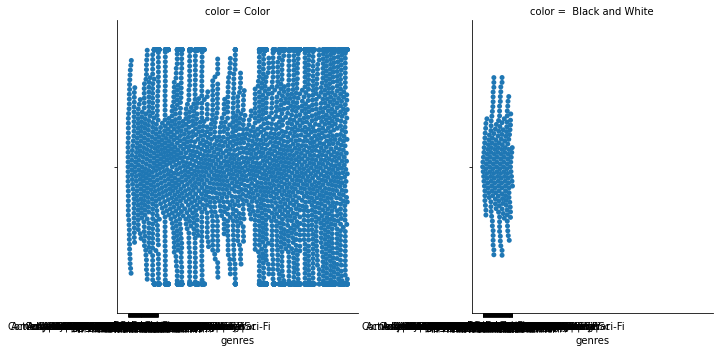

In [ ]:
sns.catplot('genres', col='color', data=movie_df, kind='swarm')

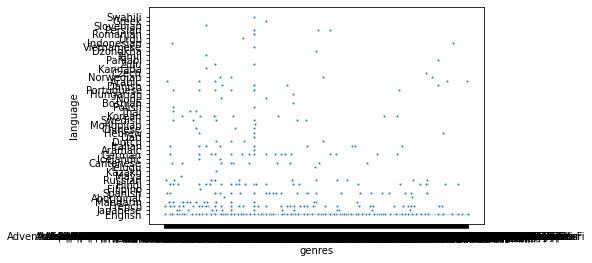

In [ ]:
sns.scatterplot(x='genres',y='language',data=movie_df,s=8)

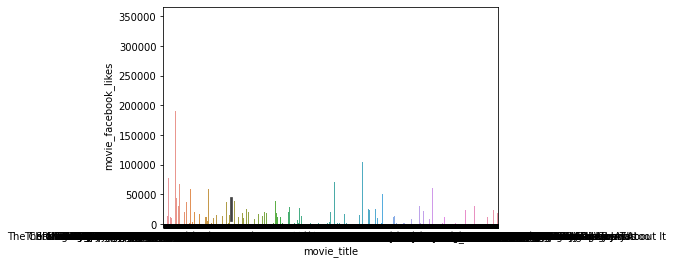

In [ ]:
sns.barplot(x='movie_title',y='movie_facebook_likes',data=movie_df)

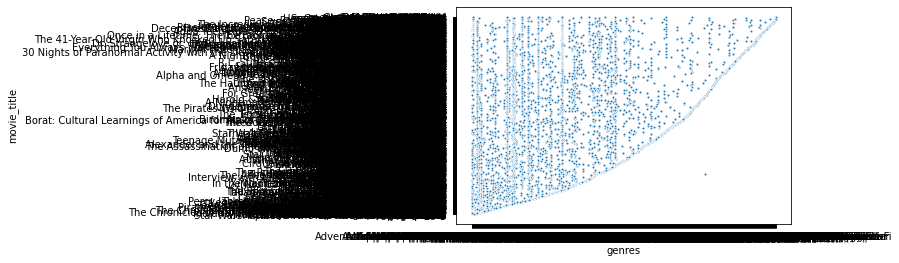

In [ ]:
sns.scatterplot(x='genres',y='movie_title',data=movie_df,s=8)

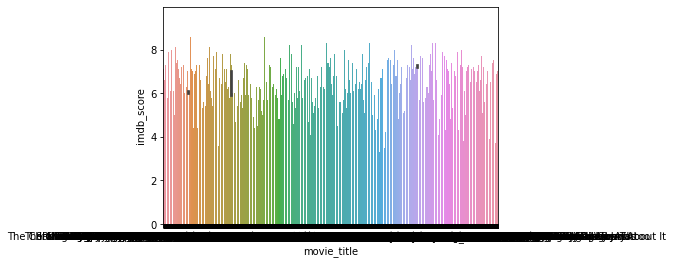

In [ ]:
sns.barplot(x='movie_title',y='imdb_score',data=movie_df)

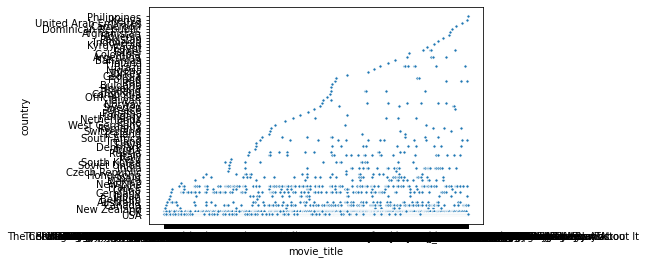

In [ ]:
sns.scatterplot(x='movie_title',y='country',data=movie_df,s=10)

In [ ]:
le=LabelEncoder()
movie_df['genres']=le.fit_transform(movie_df['genres'])
movie_df['language']=le.fit_transform(movie_df['language'])
movie_df['color']=le.fit_transform(movie_df['color'])
movie_df['country']=le.fit_transform(movie_df['country'])

In [ ]:
X1=movie_df.iloc[:,3:]
Y1=movie_df.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2)

In [ ]:
Y1

0       106
1       100
2       127
3       287
4       753
       ... 
5038    605
5039    735
5040    823
5041    638
5042    753
Name: genres, Length: 5043, dtype: int64

In [ ]:
s=StandardScaler()
df_norm1=s.fit_transform(X1)

In [ ]:
df_norm1

array([[-0.1795265 ,  0.40308529,  0.52397982,  1.29587271,  1.31863223],
       [-0.1795265 ,  0.40308529,  0.36344823,  0.58476432, -0.38957233],
       [-0.1795265 ,  0.3374383 ,  1.00557459,  0.31809868,  4.0103485 ],
       ...,
       [-0.1795265 ,  0.40308529,  0.845043  , -0.12634406, -0.38874411],
       [-0.1795265 ,  0.40308529,  0.7647772 , -0.12634406, -0.35540824],
       [-0.1795265 ,  0.40308529,  0.12265085,  0.14032158, -0.36596805]])